<a href="https://colab.research.google.com/github/amaldoror/Notebooks/blob/main/Hightmap_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import cm
from google.colab import files   # only for google colab

In [2]:
def read_heightmap(file_path):
    # Open the image file
    with Image.open(file_path) as img:
        # Convert to grayscale and return as numpy array
        return np.array(img.convert('L'))

In [3]:
def apply_custom_colormap(heights, color_ranges):
    # Create a custom colormap
    colors = [range_info['color'] for range_info in color_ranges]
    n_bins = len(color_ranges) - 1
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list("custom", colors, N=n_bins)

    # Normalize heights to [0, 1]
    min_height, max_height = heights.min(), heights.max()
    norm_heights = (heights - min_height) / (max_height - min_height)

    # Apply colormap
    return cmap(norm_heights)

In [4]:

def visualize_heightmap(heightmap, color_ranges):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    x, y = np.meshgrid(range(heightmap.shape[1]), range(heightmap.shape[0]))

    # Apply custom colors
    colors = apply_custom_colormap(heightmap, color_ranges)

    # Plot the surface
    surf = ax.plot_surface(x, y, heightmap, facecolors=colors, shade=False)

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Height')
    ax.set_title('3D Heightmap Visualization')

    plt.show()

In [9]:
# Example usage
uploaded = files.upload()
file_path = next(iter(uploaded))
#file_path = 'path/to/heightmap.png'   # Only for Jupyter notebook
heightmap = read_heightmap(file_path)

Saving A-heightmap-of-the-area-surrounding-the-Temple-of-Apollo-at-Bassae-Greece-NASA-2018.png to A-heightmap-of-the-area-surrounding-the-Temple-of-Apollo-at-Bassae-Greece-NASA-2018 (2).png


In [10]:
# Define color ranges (adjust as needed)
color_ranges = [
    {'min': 0, 'max': 50, 'color': 'darkblue'},
    {'min': 51, 'max': 100, 'color': 'blue'},
    {'min': 101, 'max': 150, 'color': 'green'},
    {'min': 151, 'max': 200, 'color': 'yellow'},
    {'min': 201, 'max': 255, 'color': 'red'}
]

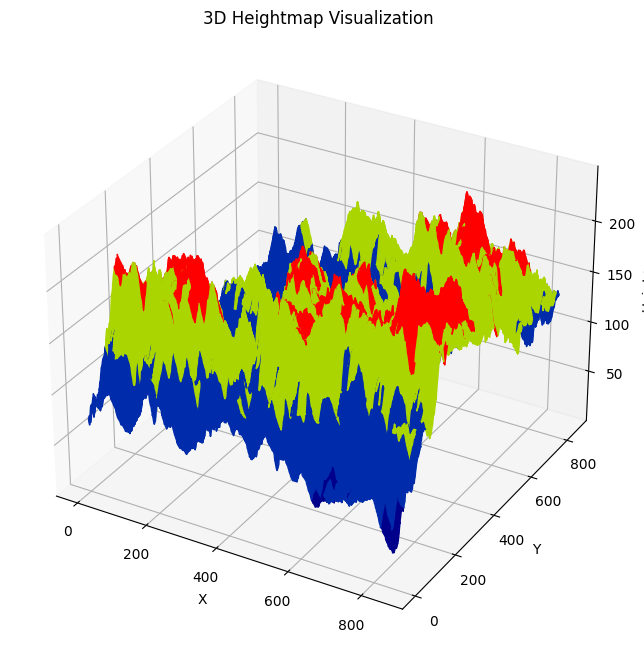

In [11]:
visualize_heightmap(heightmap, color_ranges)